In [1]:
def testSimilarity(str1, str2):  
    minDis=minDistance(str1, str2);  
    print('The minium distance is:', minDis)  
    similarity = 1 - minDis/ max(len(str1),len(str2))  
    print('The distance is: %.2f' % similarity)  


    if __name__ == '__main__':  
    str1 = input('Please input string1: ')  
    str2 = input('Please input string2: ')  
    testSimilarity(str1, str2)  


In [53]:
#create corpus
text1 = open("/Users/leonwong/Desktop/WDS/code/text_similarity/corpus/Covid_vaccination.txt", 'r').read()
text2 = open("/Users/leonwong/Desktop/WDS/code/text_similarity/corpus/Covid.txt", 'r').read()
text3 = open("/Users/leonwong/Desktop/WDS/code/text_similarity/corpus/Tim_BL.txt", 'r').read()
text4 = open("/Users/leonwong/Desktop/WDS/code/text_similarity/corpus/KI.txt", 'r').read()
text5 = open("/Users/leonwong/Desktop/WDS/code/text_similarity/corpus/KI_Covid.txt", 'r').read()

# text1

In [3]:
def get_words(text):
    tokenizer = RegexpTokenizer(r'\w+')
    return tokenizer.tokenize(text)

# words = get_words(text1)
# print(words[0:50])

In [4]:
def remove_stopwords(text):
    stop_words = stopwords.words('english')
    cleanned_words = []
    for wd in text:
        if wd.lower() not in stop_words:
            cleanned_words.append(wd.lower())
            
    return cleanned_words

# wordss = remove_stopwords(words)
# print(wordss[0:50])

In [5]:
# def get_stems(text):
#     stemmer = stem.PorterStemmer()
    
#     stem_words = []
#     for wd in text:
#         stem_words.append(stemmer.stem(wd))
#     return stem_words

# wordsss = get_stems(wordssss)
# print(wordsss[0:50])

In [6]:
def get_lemmas(text):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in text]

# wordssss = get_lemmas(wordss)
# print(wordssss[0:50])

In [7]:
#Jaccard Similarity
def get_jaccard_similarity(text1, text2):
    words_text1 = get_lemmas(remove_stopwords(get_words(text1)))
    words_text2 = get_lemmas(remove_stopwords(get_words(text2)))
    
    nr = len(set(words_text1).intersection(set(words_text2)))
    dr = len(set(words_text2).union(set(words_text2)))
    
    jaccard_sim = nr / dr
    return jaccard_sim

In [8]:
#preprocess 
def preprocess(text):
    text_without_stopwords = ""
    for wd in get_lemmas(remove_stopwords(get_words(text))):
        text_without_stopwords += ' ' + wd
    return text_without_stopwords

# x = preprocess(text1)
# x

In [9]:
#TF-IDF and Cosine

#extract the document feature vector
def get_tf_idf_vectors(corpus):
    tfidf_vectorizer = TfidfVectorizer(smooth_idf=True)
    tfidf_results = tfidf_vectorizer.fit_transform(corpus).todense()
    return tfidf_results


In [82]:
#combine all corpus
corpus = [preprocess(text1), preprocess(text2), preprocess(text3), preprocess(text4), preprocess(text5)]
tf_idf_vectors = get_tf_idf_vectors(corpus)
# tf_idf_vectors

In [73]:
# #use bag of word enhance the TF-IDF vaild
# from sklearn.feature_extraction.text import CountVectorizer

# #define a vectorizer tool
# vectorizer = CountVectorizer(min_df=1, max_df=1.0, token_pattern='\\b\\w+\\b')#support single char

# vectorizer.fit(corpus)

# bag_of_words = vectorizer.get_feature_names()
# # print("词袋:", bag_of_words)

# #transform to vector
# X = vectorizer.transform(corpus)

# #tf-idf
# from sklearn.feature_extraction.text import TfidfTransformer
# tfidf_transformer = TfidfTransformer()

# #根据语料集的词袋向量计算（fit）TF-IDF
# tfidf_transformer.fit(X.toarray())

    
# #将语料集的词袋向量表示转换为TF-IDF向量表示
# tfidf_bag = tfidf_transformer.transform(X)
# # print("\n")
# # print("语料库TF-IDF矩阵:")
# # print(tfidf.toarray())

In [74]:
#get the cosine similarity
def get_cosine_similarity(vector1, vector2):
    return cosine_similarity(vector1, vector2)

In [75]:
jac_sim1 = get_jaccard_similarity(text1, text2)
jac_sim2 = get_jaccard_similarity(text1, text3)
jac_sim3 = get_jaccard_similarity(text1, text4)
jac_sim4 = get_jaccard_similarity(text1, text5)
jac_sim5 = get_jaccard_similarity(text2, text3)
jac_sim6 = get_jaccard_similarity(text2, text4)
jac_sim7 = get_jaccard_similarity(text2, text5)
jac_sim8 = get_jaccard_similarity(text3, text4)
jac_sim9 = get_jaccard_similarity(text3, text5)
jac_sim10 = get_jaccard_similarity(text4, text5)

In [76]:
tfidf1 = get_cosine_similarity(tf_idf_vectors[0], tf_idf_vectors[1])
tfidf2 = get_cosine_similarity(tf_idf_vectors[0], tf_idf_vectors[2])
tfidf3 = get_cosine_similarity(tf_idf_vectors[0], tf_idf_vectors[3])
tfidf4 = get_cosine_similarity(tf_idf_vectors[0], tf_idf_vectors[4])
tfidf5 = get_cosine_similarity(tf_idf_vectors[1], tf_idf_vectors[2])
tfidf6 = get_cosine_similarity(tf_idf_vectors[1], tf_idf_vectors[3])
tfidf7 = get_cosine_similarity(tf_idf_vectors[1], tf_idf_vectors[4])
tfidf8 = get_cosine_similarity(tf_idf_vectors[2], tf_idf_vectors[3])
tfidf9 = get_cosine_similarity(tf_idf_vectors[2], tf_idf_vectors[4])
tfidf10 = get_cosine_similarity(tf_idf_vectors[3], tf_idf_vectors[4])

In [77]:
# tfidf_b1 = get_cosine_similarity(tfidf_bag[0], tfidf_bag[1])
# tfidf_b2 = get_cosine_similarity(tfidf_bag[0], tfidf_bag[2])
# tfidf_b3 = get_cosine_similarity(tfidf_bag[0], tfidf_bag[3])
# tfidf_b4 = get_cosine_similarity(tfidf_bag[0], tfidf_bag[4])
# tfidf_b5 = get_cosine_similarity(tfidf_bag[1], tfidf_bag[2])
# tfidf_b6 = get_cosine_similarity(tfidf_bag[1], tfidf_bag[3])
# tfidf_b7 = get_cosine_similarity(tfidf_bag[1], tfidf_bag[4])
# tfidf_b8 = get_cosine_similarity(tfidf_bag[2], tfidf_bag[3])
# tfidf_b9 = get_cosine_similarity(tfidf_bag[2], tfidf_bag[4])
# tfidf_b10 = get_cosine_similarity(tfidf_bag[3], tfidf_bag[4])

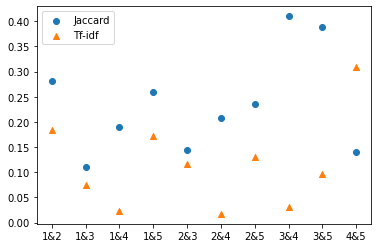

Text1-Covid-19 vaccination
Text2-Covid-19 situation
Text3-Introduction of Tim Berners-Lee
Text4-Introduction of Kyrie Irving
Text5-Kyrie Irving rejected Covid-19 vaccination


In [81]:
import matplotlib.pyplot as plt
import numpy as np
# Ensure that the picture is displayed normally in the browser
%matplotlib inline

x = np.array(["1&2", "1&3", "1&4", "1&5", "2&3", "2&4", "2&5", "3&4", "3&5", "4&5"])
y1 = np.array([jac_sim1, jac_sim2, jac_sim3, jac_sim4, jac_sim5, jac_sim6, jac_sim7, jac_sim8, jac_sim9, jac_sim10])
y2 = np.array([tfidf1, tfidf2, tfidf3, tfidf4, tfidf5, tfidf6, tfidf7, tfidf8, tfidf9, tfidf10])
# y3 = np.array([tfidf_b1, tfidf_b2, tfidf_b3, tfidf_b4, tfidf_b5, tfidf_b6, tfidf_b7, tfidf_b8, tfidf_b9, tfidf_b10])

plt.scatter(x, y1, marker='o', label="Jaccard")
plt.scatter(x, y2, marker='^', label="Tf-idf")
# plt.scatter(x, y3, marker='*', label="Bag of word")
plt.legend(loc='best')
plt.show()
print("Text1-Covid-19 vaccination\n"
       "Text2-Covid-19 situation\n"
       "Text3-Introduction of Tim Berners-Lee\n"
       "Text4-Introduction of Kyrie Irving\n"
       "Text5-Kyrie Irving rejected Covid-19 vaccination")